In [1]:
import numpy as np

In [2]:
np.__version__

'1.18.2'

## 예제 10-3-2-1 convolve  2차원 처리하기 

In [3]:
A= [[5, 4, 5, 4],
    [3 ,2, 3 , 2], 
    [5 , 4, 5, 4],
    [3 ,2 ,3 , 2 ]]

In [4]:
A = np.array(A)

In [5]:
k = np.array([0.707, 0.707])

In [6]:
C = np.zeros((4,5))

In [7]:
for i in range(4) :
    C[i] = np.convolve(A[i],k, mode='full')

In [8]:
C

array([[3.535, 6.363, 6.363, 6.363, 2.828],
       [2.121, 3.535, 3.535, 3.535, 1.414],
       [3.535, 6.363, 6.363, 6.363, 2.828],
       [2.121, 3.535, 3.535, 3.535, 1.414]])

In [9]:
k_ = np.array([0.707, 0.707]).reshape(1,2)

In [10]:
A.shape, k_.shape

((4, 4), (1, 2))

In [11]:
from scipy import signal

In [12]:
grad = signal.convolve2d(A, k_, boundary='fill', mode='full')

In [13]:
grad.shape

(4, 5)

In [14]:
grad

array([[3.535, 6.363, 6.363, 6.363, 2.828],
       [2.121, 3.535, 3.535, 3.535, 1.414],
       [3.535, 6.363, 6.363, 6.363, 2.828],
       [2.121, 3.535, 3.535, 3.535, 1.414]])

In [15]:
x = np.array([[1, 1, 1, 0, 0],
              [0, 1, 1, 1, 0],
              [0, 0, 1, 1, 1],
              [0, 0, 1, 1, 0],
              [0, 1, 1, 0, 0]],dtype='float')

In [16]:
w_k = np.array([[1, 0, 1],
               [0, 1, 0],
               [1, 0, 1],],dtype='float')

In [17]:
x.shape, w_k.shape

((5, 5), (3, 3))

In [18]:
f = signal.convolve2d(x, w_k, 'valid')

In [19]:
f.shape

(3, 3)

In [20]:
f

array([[4., 3., 4.],
       [2., 4., 3.],
       [2., 3., 4.]])

In [21]:
fs = signal.convolve2d(x, w_k, 'same')

In [22]:
fs.shape

(5, 5)

In [23]:
fs

array([[2., 2., 3., 1., 1.],
       [1., 4., 3., 4., 1.],
       [1., 2., 4., 3., 3.],
       [1., 2., 3., 4., 1.],
       [0., 2., 2., 1., 1.]])

In [24]:
fl = signal.convolve2d(x, w_k, 'full')

In [25]:
fl.shape

(7, 7)

In [26]:
fl

array([[1., 1., 2., 1., 1., 0., 0.],
       [0., 2., 2., 3., 1., 1., 0.],
       [1., 1., 4., 3., 4., 1., 1.],
       [0., 1., 2., 4., 3., 3., 0.],
       [0., 1., 2., 3., 4., 1., 1.],
       [0., 0., 2., 2., 1., 1., 0.],
       [0., 1., 1., 1., 1., 0., 0.]])

## 예제 10-4-2-3  이미지 처리 알아보기 

In [27]:
from scipy import misc

In [28]:
face = misc.face(gray=True)

In [29]:
face.shape

(768, 1024)

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
import warnings
warnings.filterwarnings('ignore')

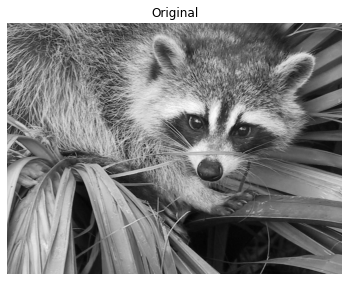

In [32]:
fig, ax_orig = plt.subplots(1, 1, figsize=(6, 15))
ax_orig.imshow(face, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
fig.show()

In [33]:
scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],
                   [-10+0j, 0+ 0j, +10 +0j],
                   [ -3+3j, 0+10j,  +3 +3j]]) # Gx + j*Gy

In [34]:
grad = signal.convolve2d(face, scharr, boundary='symm', mode='same')

In [35]:
grad.shape

(768, 1024)

In [36]:
grad[0]

array([-271.+481.j, -523.+419.j, -299.+349.j, ..., -244. +16.j,
       -318. -74.j, -140.-132.j])

In [37]:
np.abs(grad[0,0])

552.0887609796091

In [38]:
np.absolute(grad[0,0])

552.0887609796091

In [39]:
np.absolute(grad[0])

array([552.08876098, 670.14177604, 459.56718769, ..., 244.52402745,
       326.49655435, 192.41621553])

In [40]:
np.angle(grad[0,0])

2.0838764628714874

In [41]:
np.angle(grad[0,0], deg=True)

119.39732634918663

In [42]:
np.angle(grad[0])

array([ 2.08387646,  2.46615257,  2.27918658, ...,  3.07611263,
       -2.91295726, -2.38559778])

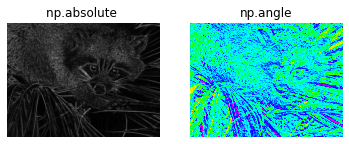

In [43]:
fig, (ax_mag, ax_ang) = plt.subplots(1, 2, figsize=(6, 15))
ax_mag.imshow(np.absolute(grad), cmap='gray')
ax_mag.set_title('np.absolute ')
ax_mag.set_axis_off()
ax_ang.imshow(np.angle(grad), cmap='hsv') # hsv is cyclic, like angles
ax_ang.set_title('np.angle')
ax_ang.set_axis_off()
fig.show()